In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-12-30 21:12:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-12-30 21:12:34 (11.5 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


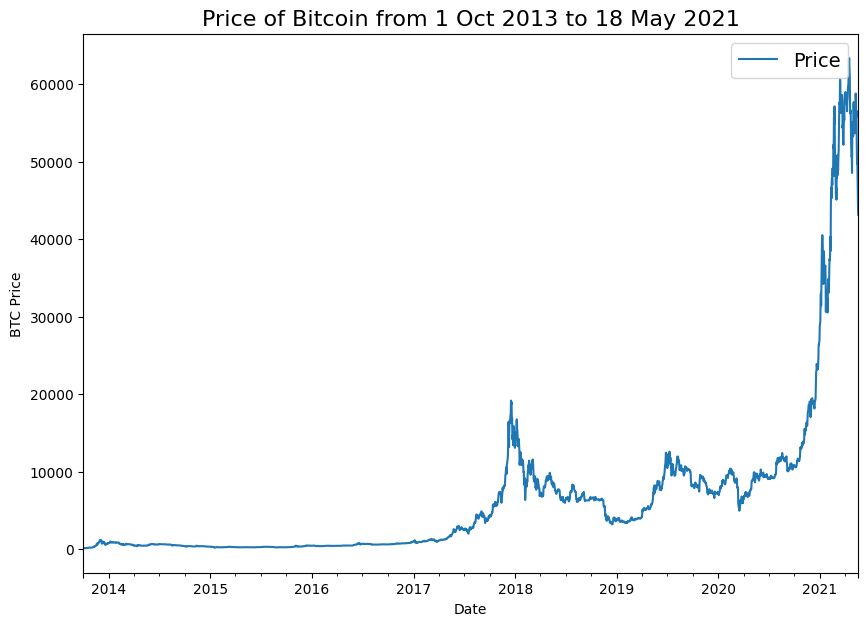

In [ ]:
from types import BuiltinFunctionType
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14)

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 May 2021')

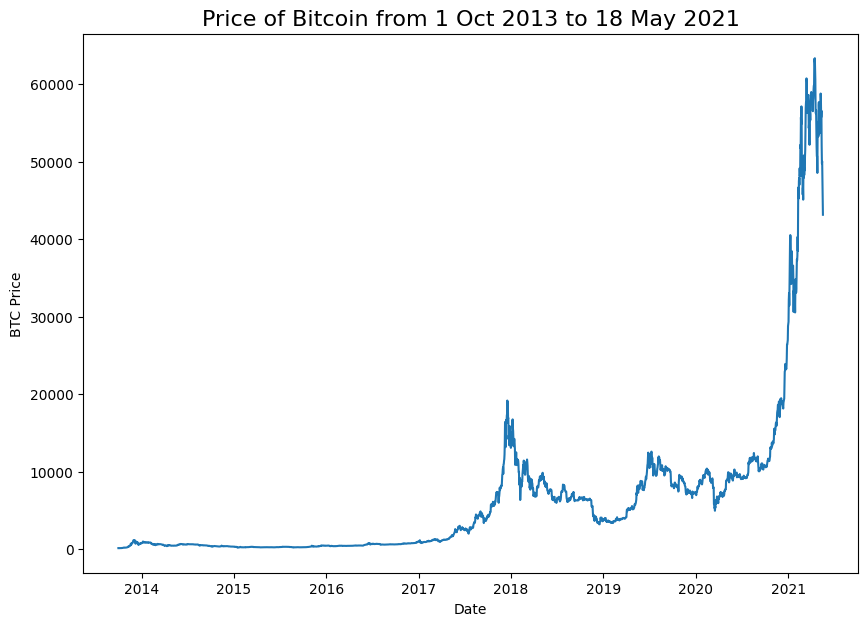

In [ ]:
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape

(2229,)

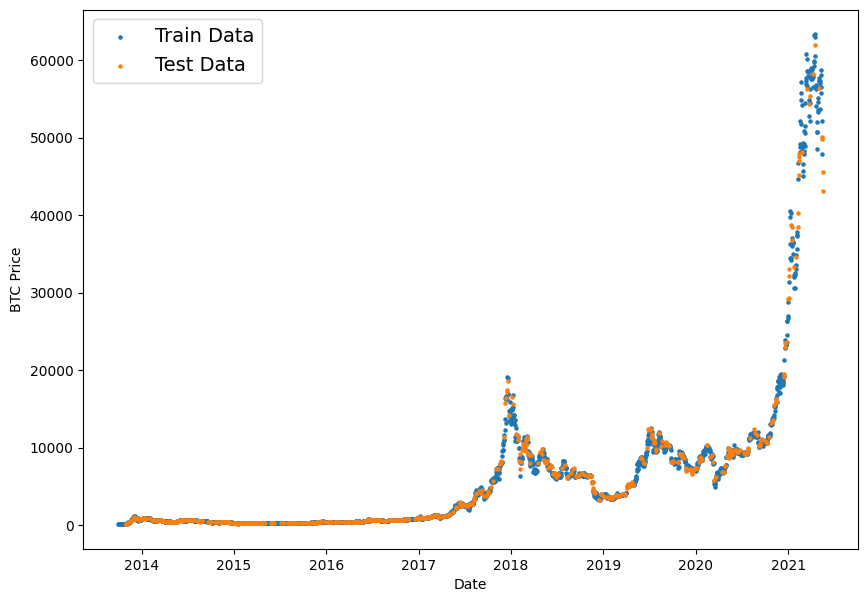

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train Data')
plt.scatter(X_test, y_test, s=5, label='Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show();

In [ ]:
split_size = int(0.8*len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

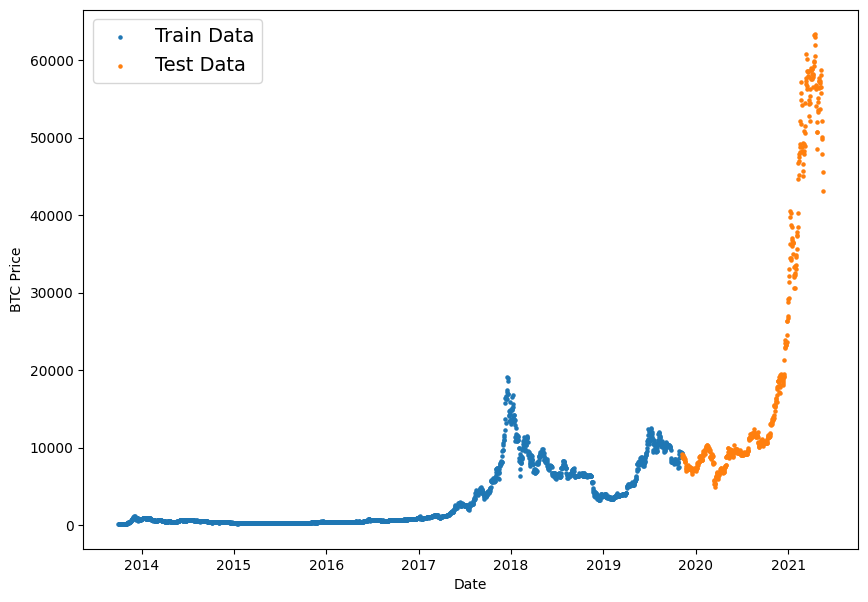

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train Data')
plt.scatter(X_test, y_test, s=5, label='Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show();

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format , label=label)
  plt.xlabel('Date')
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

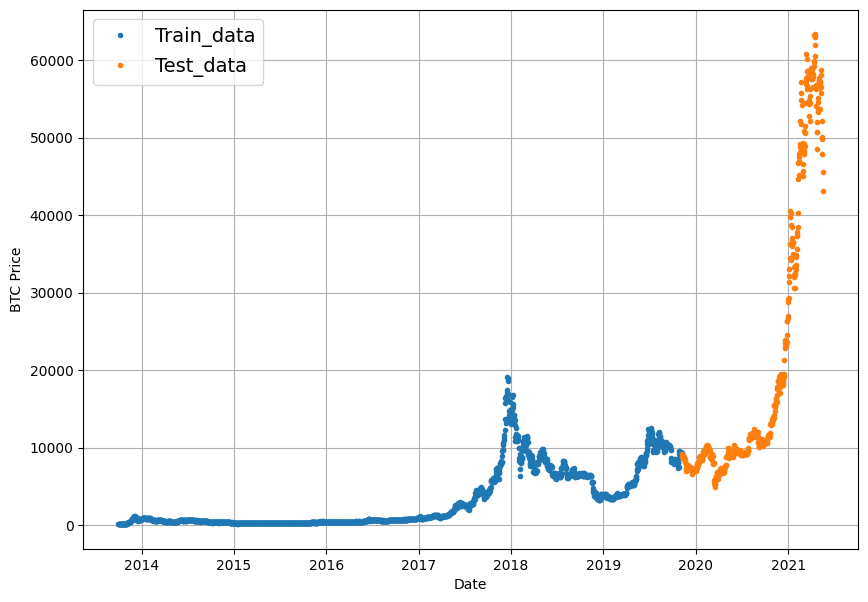

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label='Train_data')
plot_time_series(timesteps=X_test, values=y_test, label='Test_data')

In [ ]:
naive_forecast = y_test[:-1]

In [ ]:
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

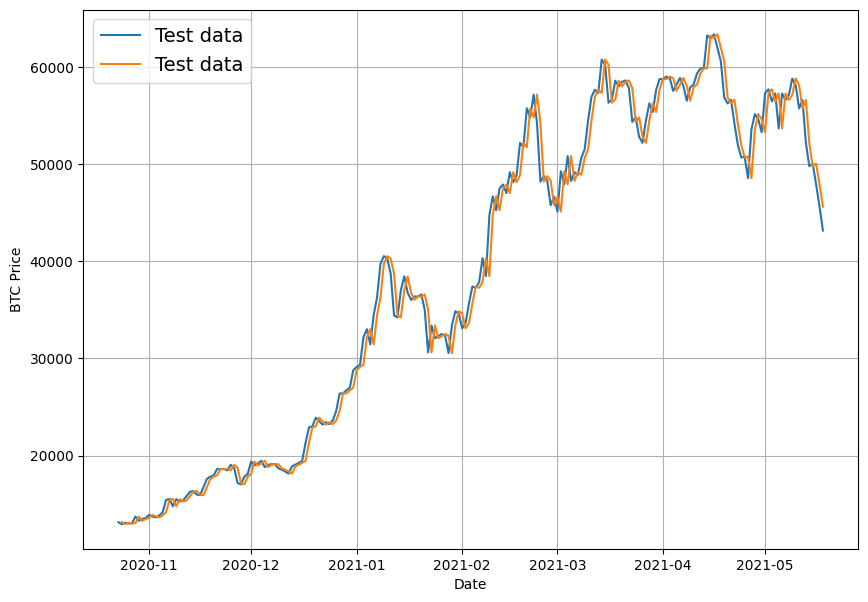

In [ ]:
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, format='-', start=350, label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', start=350, label='Test data')

In [ ]:
import tensorflow as tf

In [ ]:
# MASE IMPLEMENTATION
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  return {'MAE': tf.reduce_mean(tf.abs(y_true-y_pred)).numpy(),
          'MSE': tf.reduce_mean(tf.square(y_true-y_pred)).numpy(),
          'RMSE': tf.sqrt(tf.reduce_mean(tf.square(y_true-y_pred))).numpy(),
          'MAPE': (100 * tf.reduce_mean(tf.abs(y_true-y_pred) / y_true)).numpy(),
          'MASE':mean_absolute_scaled_error(y_true, y_pred).numpy()}

In [ ]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)

In [ ]:
HORIZON = 1
WINDOW_SIZE=7

In [ ]:
def get_labelled_window(x, horizon=HORIZON):
  return x[:,:-horizon], x[:,-horizon:]

In [ ]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1,axis=0))

In [ ]:
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
btc_price

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116,
 125.27966,
 125.9275,
 126.38333,
 135.24199,
 133.20333,
 142.76333,
 137.92333,
 142.95166,
 152.55183,
 160.33883,
 164.31499,
 177.63333,
 188.29716,
 200.70166,
 180.355,
 175.03166,
 177.6965,
 187.15983,
 192.75666,
 197.4,
 196.02499,
 198.04883,
 198.93233,
 200.543,
 210.3075,
 225.02,
 248.25333,
 262.32666,
 294.48699,
 331.10325,
 285.8875,
 304.97974,
 338.137,
 357.48,
 402.954,
 409.10375,
 420.21649,
 437.29725,
 510.6025,
 693.65,
 531.54249,
 574.71599,
 681.33,
 774.18,
 746.19374,
 768.8475,
 789.36475,
 893.1815,
 934.355,
 1068.363,
 1154.92593,
 1099.51926,
 1019.78966,
 1028.845,
 1071.2848,
 1139.33083,
 1004.61633,
 759.43041,
 689.81,
 841.83966,
 916.77599,
 967.42866,
 866.29003,
 911.23204,
 889.81946,
 848.9975,
 868.95316,
 653.80483,
 654.06266,
 553.69166,
 693.05883,
 649.38965,
 595.95883,
 647.68316,
 671.58116,
 659.84333,
 702.00083,
 

In [ ]:
import numpy as np
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  windowed_array = x[window_indexes]
  windows, labels = get_labelled_window(windowed_array)
  return windows, labels



In [ ]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
len(prices)

2787

In [ ]:
for i in range(3):
  print(f'Window: {full_windows[i]} --> Label {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> Label [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> Label [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> Label [125.96116]


In [ ]:
def make_train_test_splits(windows,labels,test_split=0.2):
  splits_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
len(train_windows), len(test_windows)

(2229, 551)

In [ ]:
import os
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense Model (w=1, h=7)

In [ ]:
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

history_1 = model_1.fit(x=train_windows,
                        y=train_labels,
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 46ms/step - loss: 1196.1462 - mae: 1196.1462 - mse: 5385109.0000 - val_loss: 3472.4592 - val_mae: 3472.4592 - val_mse: 25881314.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 309.8333 - mae: 309.8333 - mse: 383463.7188 - val_loss: 1063.9232 - val_mae: 1063.9232 - val_mse: 3666276.5000
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 192.1691 - mae: 192.1691 - mse: 187217.1719 - val_loss: 987.2303 - val_mae: 987.2303 - val_mse: 3199012.7500
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 174.2355 - mae: 174.2355 - mse: 160097.5312 - val_loss: 971.1817 - val_mae: 971.1817 - val_mse: 2933730.5000
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 167.4217 - mae: 167.4217 - mse: 145280.5312 - val_loss: 968.1377 - val_mae: 968.1377 - val_mse: 2835191.5000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 160

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 587.3557 - mae: 587.3557 - mse: 1213467.3750


[587.355712890625, 587.355712890625, 1213467.375]

In [ ]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

In [ ]:
model_1 = tf.keras.models.load_model('/content/model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 573.9928 - mae: 573.9928 - mse: 1179564.7500


[573.9927978515625, 573.9927978515625, 1179564.75]

In [ ]:
model_1_preds = model_1.predict(test_windows)
model_1_results = evaluate_preds(test_labels, model_1_preds)
model_1_results

18/18 [==============================] - 0s 2ms/step


{'MAE': 573.99286,
 'MSE': 1179564.8,
 'RMSE': 1086.0776,
 'MAPE': 2.5799525,
 'MASE': 1.0018183}

In [ ]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

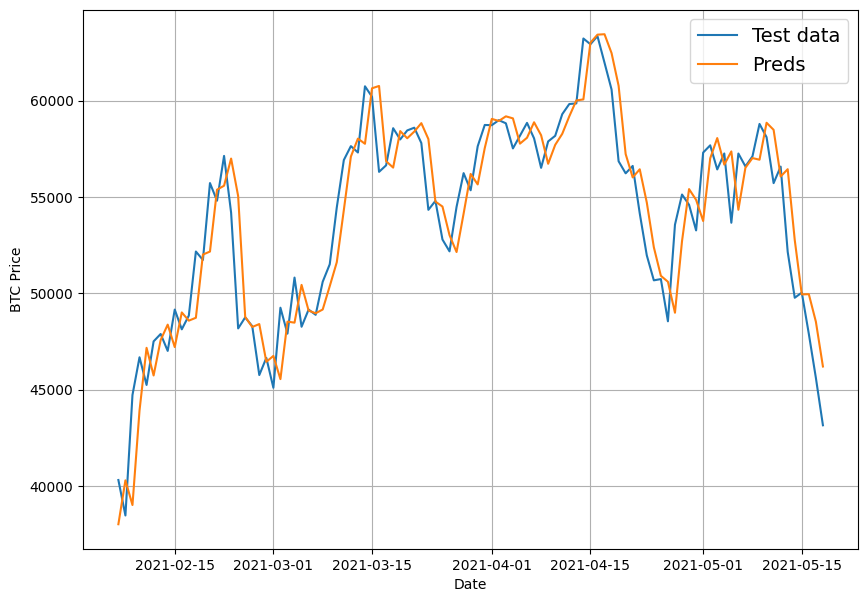

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], format='-', start=450, label='Test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, format='-', start=450, label='Preds')

In [ ]:
HORIZON=1
WINDOW_SIZE=30

In [ ]:
full_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_labels[0])

1

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)

In [ ]:
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2_dense')

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.evaluate(test_windows,test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 632.9523 - mae: 632.9523 - mse: 1354414.0000


[632.9522705078125, 632.9522705078125, 1354414.0]

In [ ]:
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')

In [ ]:
model_2.evaluate(test_windows,test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 632.9523 - mae: 632.9523 - mse: 1354414.0000


[632.9522705078125, 632.9522705078125, 1354414.0]

In [ ]:
model_2_preds = model_2.predict(test_windows)
model_2_results = evaluate_preds(test_labels, model_2_preds)
model_2_results

17/17 [==============================] - 0s 2ms/step


{'MAE': 632.9523,
 'MSE': 1354414.0,
 'RMSE': 1163.793,
 'MAPE': 2.8062506,
 'MASE': 1.0713205}

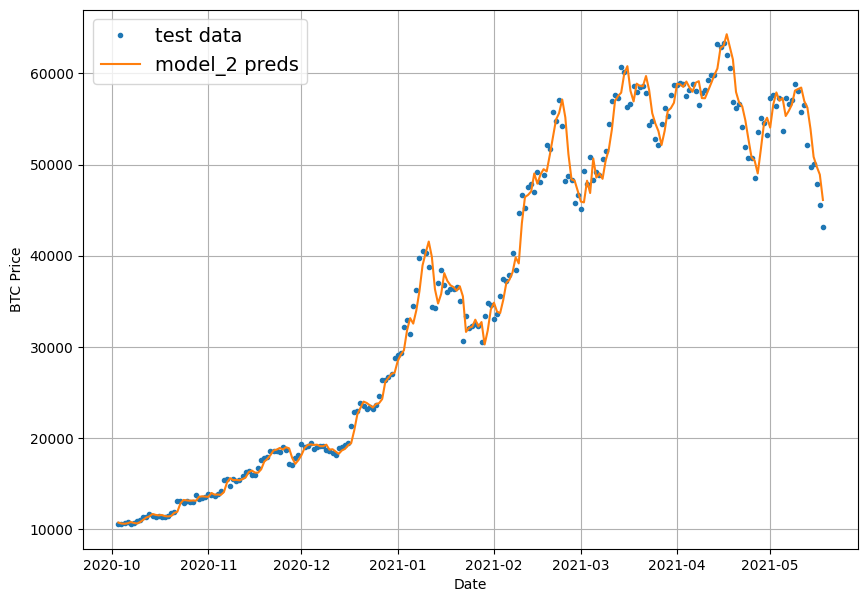

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format='-', label='model_2 preds')

In [ ]:
HORIZON=7
WINDOW_SIZE=30
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3_preds = model_3.predict(test_windows)
model_3_results = evaluate_preds(test_labels, model_3_preds)
model_3_results

17/17 [==============================] - 0s 2ms/step


{'MAE': 681.23645,
 'MSE': 1529513.5,
 'RMSE': 1236.735,
 'MAPE': 2.9862783,
 'MASE': 1.1414819}

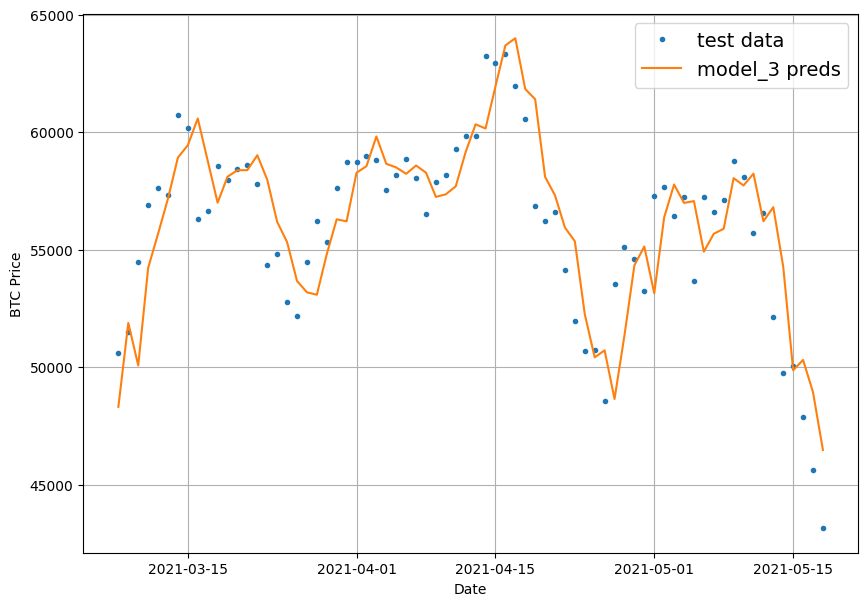

In [ ]:
offset=450
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds[:,0], start=offset, format='-', label='model_3 preds')

In [ ]:
model_3_preds

array([[ 7209.5386,  7178.332 ,  7073.5786, ...,  7144.9814,  7173.491 ,
         7002.1396],
       [ 7203.052 ,  7258.2754,  7166.4897, ...,  7099.549 ,  7115.6816,
         7117.2583],
       [ 7099.719 ,  7156.071 ,  7077.459 , ...,  7045.454 ,  7106.798 ,
         7054.4966],
       ...,
       [50306.152 , 50926.105 , 49275.145 , ..., 49595.25  , 50448.914 ,
        50005.008 ],
       [48935.56  , 48613.207 , 48313.45  , ..., 49470.004 , 47893.484 ,
        48071.02  ],
       [46473.72  , 46626.91  , 46487.617 , ..., 45657.004 , 46342.027 ,
        46351.465 ]], dtype=float32)

In [ ]:
test_labels.shape, model_3_preds.shape

((522, 1), (522, 7))

In [ ]:
test_labels[0], model_3_preds[0]

(array([7238.87432299]),
 array([7209.5386, 7178.332 , 7073.5786, 7226.2314, 7144.9814, 7173.491 ,
        7002.1396], dtype=float32))

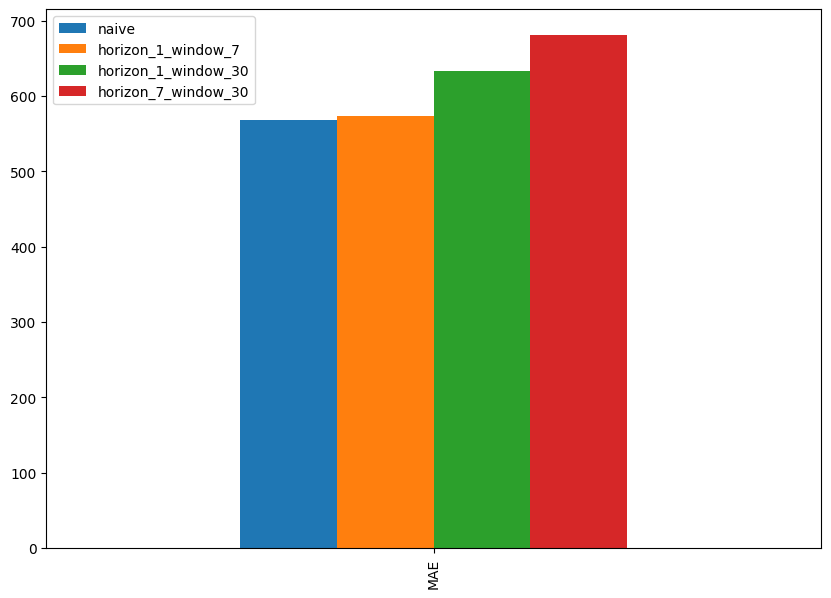

In [ ]:
pd.DataFrame({'naive':naive_results['MAE'],
              'horizon_1_window_7':model_1_results['MAE'],
              'horizon_1_window_30':model_2_results['MAE'],
              'horizon_7_window_30':model_3_results['MAE']},index=['MAE']).plot(figsize=(10,7), kind='bar');

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)

In [ ]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer=layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x, axis=1)),
    layers.Conv1D(128, kernel_size=5, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_Conv1D')

model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4 = tf.keras.models.load_model('model_experiments/model_4_Conv1D/')
model_4_preds = model_4.predict(test_windows)
model_4_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_4_preds))
model_4_results

18/18 [==============================] - 0s 4ms/step


{'MAE': 568.40137,
 'MSE': 1175230.8,
 'RMSE': 1084.0806,
 'MAPE': 2.540571,
 'MASE': 0.99205923}

In [ ]:
tf.squeeze(model_4_preds).shape, test_labels.shape

(TensorShape([551]), (551, 1))

In [ ]:
model_1_results

{'MAE': 573.99286,
 'MSE': 1179564.8,
 'RMSE': 1086.0776,
 'MAPE': 2.5799525,
 'MASE': 1.0018183}

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
#x = layers.Dense(32,activation='relu')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output, name='model_5_LSTM')

model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 99ms/step - loss: 2536.8430 - val_loss: 12040.3555
Epoch 2/100
18/18 [==============================] - 2s 101ms/step - loss: 1152.8063 - val_loss: 1849.5699
Epoch 3/100
18/18 [==============================] - 2s 118ms/step - loss: 281.7399 - val_loss: 1132.7367
Epoch 4/100
18/18 [==============================] - 1s 84ms/step - loss: 212.3516 - val_loss: 1118.1636
Epoch 5/100
18/18 [==============================] - 1s 83ms/step - loss: 201.1422 - val_loss: 1116.3712
Epoch 6/100
18/18 [==============================] - 2s 107ms/step - loss: 198.6865 - val_loss: 1114.2432
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 197.0928 - val_loss: 1139.3112
Epoch 8/100
18/18 [==============================] - 1s 82ms/step - loss: 193.2893 - val_loss: 1086.1821
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 193.0023 - val_loss: 1123.0310
Epoch 10/100
18/18 [==============================]

In [ ]:
model_5 = tf.keras.models.load_model('model_experiments/model_5_LSTM/')
model_5_preds = model_5.predict(test_windows)
model_5_results = evaluate_preds(tf.squeeze(test_labels), tf.squeeze(model_5_preds))
model_5_results

18/18 [==============================] - 1s 2ms/step


{'MAE': 594.7825,
 'MSE': 1256046.8,
 'RMSE': 1120.7349,
 'MAPE': 2.6706684,
 'MASE': 1.0381035}

In [ ]:
block_reward_1 = 50 # 3 Jan 2009
block_reward_2 = 25 # 8 Nov 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

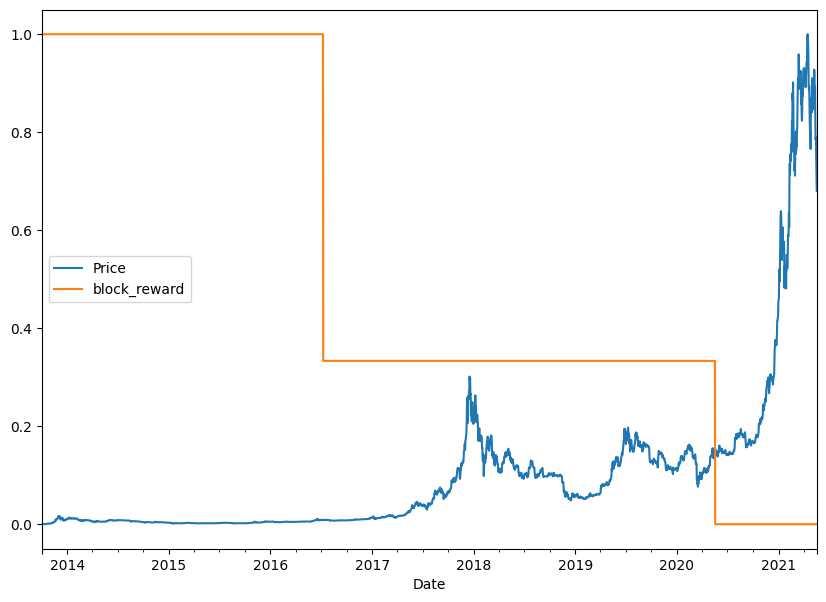

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1 ).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [ ]:
split_size = int(len(X)*0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 1357.0051 - val_loss: 2966.7036
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 350.8755 - val_loss: 1428.7278
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 193.6118 - val_loss: 1083.5710
Epoch 4/100
18/18 [==============================] - 0s 24ms/step - loss: 176.3655 - val_loss: 940.5975
Epoch 5/100
18/18 [==============================] - 0s 23ms/step - loss: 166.2707 - val_loss: 926.0500
Epoch 6/100
18/18 [==============================] - 0s 23ms/step - loss: 158.4649 - val_loss: 848.4915
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 150.7221 - val_loss: 809.7626
Epoch 8/100
18/18 [==============================] - 0s 23ms/step - loss: 145.6161 - val_loss: 800.6110
Epoch 9/100
18/18 [==============================] - 0s 23ms/step - loss: 146.7400 - val_loss: 793.1955
Epoch 10/100
18/18 [==============================] - 0s 25m

In [ ]:
model_6 = tf.keras.models.load_model('model_experiments/model_6_dense_multivariate/')
model_6_preds = model_6.predict(X_test)
model_6_results = evaluate_preds(y_test, tf.squeeze(model_6_preds))
model_6_results

18/18 [==============================] - 0s 2ms/step


{'MAE': 571.57294,
 'MSE': 1182773.2,
 'RMSE': 1087.5537,
 'MAPE': 2.5666814,
 'MASE': 1.0040953}

In [ ]:
y_test.shape, model_6_preds.shape

((556,), (556, 1))

In [ ]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x=layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)

In [ ]:
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip(train_features_dataset, train_labels_dataset)
test_dataset = tf.data.Dataset.zip(test_features_dataset, test_labels_dataset)

train_dataset = train_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

In [ ]:
tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock')

stack_input = layers.Input(shape=(INPUT_SIZE,), name='stack_input')
residuals, forecast = nbeats_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f'NBeatsBlock_{i}'
  )(residuals)
  residuals = layers.subtract([residuals, backcast], name=f'subtract_{i}')
  forecast = layers.add([forecast, block_forecast], name=f'add_{i}')

model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_7_nbeats')

model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])


Epoch 774: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 932: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1032: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 20ms/step - loss: 575.1899


575.1898803710938

In [ ]:
model_7_preds = model_7.predict(test_dataset)
model_7_results = evaluate_preds(y_test, tf.squeeze(model_7_preds))
model_7_results

1/1 [==============================] - 1s 1s/step


{'MAE': 575.1899,
 'MSE': 1183631.2,
 'RMSE': 1087.9481,
 'MAPE': 2.5950692,
 'MASE': 1.0104493}

In [ ]:
model_1_results

{'MAE': 573.99286,
 'MSE': 1179564.8,
 'RMSE': 1086.0776,
 'MAPE': 2.5799525,
 'MASE': 1.0018183}

In [ ]:
naive_results

{'MAE': 567.9802,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'MAPE': 2.516525,
 'MASE': 0.99957}

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=['mae','mse','mape']):
  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f'Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}')

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae','mse'])

      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time

ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 443: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 628: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 728: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 503: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 603: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 125: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 521: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 621: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 969: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing 

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds= model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 42ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8817.611 ,  8835.445 ,  9070.001 , ..., 50033.72  , 48614.953 ,
        45944.055 ],
       [ 8781.996 ,  8794.192 ,  9067.461 , ..., 50284.44  , 47988.9   ,
        45581.21  ],
       [ 8777.894 ,  8770.425 ,  9118.241 , ..., 50426.367 , 48515.06  ,
        45646.86  ],
       ...,
       [ 8875.3545,  8820.536 ,  9030.769 , ..., 50088.168 , 48595.152 ,
        45670.684 ],
       [ 8769.386 ,  8795.745 ,  9016.705 , ..., 50048.746 , 48231.816 ,
        46124.27  ],
       [ 8786.64  ,  8748.003 ,  9061.384 , ..., 49883.574 , 48835.65  ,
        45667.766 ]], dtype=float32)>

In [ ]:
ensemble_results = evaluate_preds(y_test,ensemble_preds)
ensemble_results

{'MAE': 575.73346,
 'MSE': 1167101.1,
 'RMSE': 1080.3246,
 'MAPE': 2.6099746,
 'MASE': 1.0114043}

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_results = evaluate_preds(y_test,ensemble_mean)
ensemble_results

{'MAE': 565.692,
 'MSE': 1137768.4,
 'RMSE': 1066.6622,
 'MAPE': 2.5597212,
 'MASE': 0.99376416}

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_results = evaluate_preds(y_test,ensemble_median)
ensemble_results

{'MAE': 567.75354,
 'MSE': 1144362.0,
 'RMSE': 1069.7485,
 'MAPE': 2.556964,
 'MASE': 0.99738574}

In [ ]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [ ]:
lower, upper = get_upper_lower(ensemble_preds)
lower

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8719.5205,  8703.528 ,  9002.578 ,  8665.443 ,  8648.078 ,
        8664.57  ,  8578.782 ,  8428.067 ,  8385.38  ,  8473.375 ,
        8150.6846,  8029.4985,  8004.1987,  7562.382 ,  7211.947 ,
        7235.799 ,  7009.417 ,  7090.5034,  7059.6997,  7422.0366,
        7354.972 ,  7657.0713,  7529.5737,  7325.342 ,  7261.5757,
        7245.855 ,  7161.109 ,  7326.0977,  7457.9575,  7486.0737,
        7500.375 ,  7281.962 ,  7177.322 ,  7132.1367,  7131.954 ,
        7181.476 ,  7034.5034,  7051.957 ,  6825.682 ,  6524.55  ,
        7279.23  ,  7054.263 ,  7031.085 ,  7180.0757,  7137.8203,
        7132.638 ,  7177.3564,  7162.5493,  7132.0312,  7175.5405,
        7266.893 ,  7346.9463,  7202.158 ,  7123.4326,  7105.989 ,
        6900.209 ,  7202.2925,  7285.7393,  7287.8975,  7653.8193,
        7970.48  ,  8091.1826,  7800.993 ,  8017.3477,  8040.8037,
        8093.1846,  8054.8726,  8639.106 ,  8844.991 ,  8684.974 ,
        8854.3

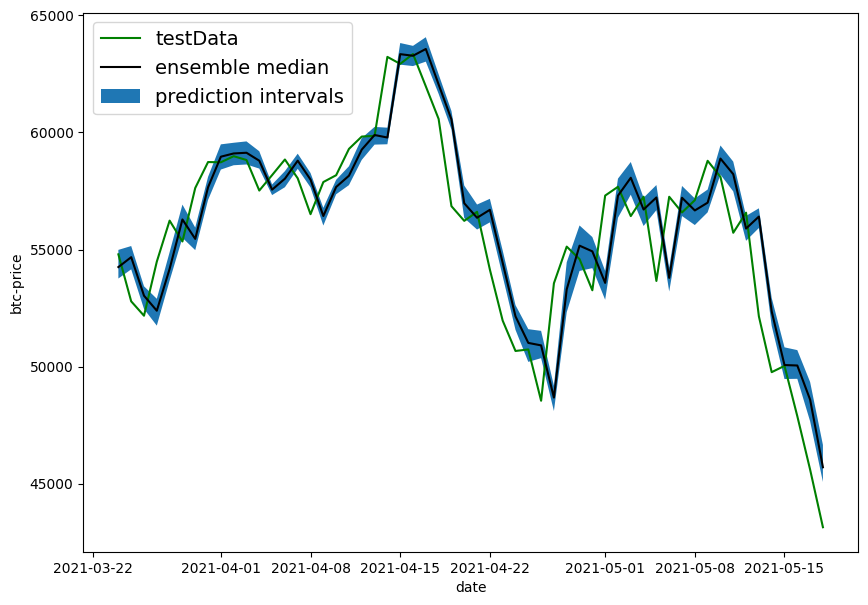

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label='testData')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label='ensemble median')
plt.xlabel('date')
plt.ylabel('btc-price')
plt.fill_between(X_test.index[offset:], (lower)[offset:], (upper)[offset:], label='prediction intervals')
plt.legend(loc='upper left', fontsize=14)

In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

len(X_all)

2780

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE=1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_9_all_data')

model_9.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [ ]:
INTO_FUTURE=14

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  future_forecast=[]
  last_window = values[-window_size:]

  for _ in range(INTO_FUTURE):
    future_pred = model.predict(tf.expand_dims(last_window,axis=0))
    print(f'Prediction on:\n {last_window} -> prediction: {tf.squeeze(future_pred).numpy()}\n')

    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window=np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE)

1/1 [==============================] - 0s 73ms/step
Prediction on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> prediction: 55427.80859375

1/1 [==============================] - 0s 26ms/step
Prediction on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55427.80859375] -> prediction: 52948.8046875

1/1 [==============================] - 0s 28ms/step
Prediction on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55427.80859375 52948.8046875 ] -> prediction: 50520.34765625

1/1 [==============================] - 0s 31ms/step
Prediction on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55427.80859375 52948.8046875  50520.34765625] -> prediction: 47786.4921875

1/1 [==============================] - 0s 26ms/step
Prediction on:
 [47885.62525472 45604.61575361 43144.47129086 55427.80859375
 52948.8046875  50520.34765625 47786.4921875 

In [ ]:
future_forecast

[55427.81,
 52948.805,
 50520.348,
 47786.492,
 46631.27,
 46276.12,
 49068.23,
 55495.977,
 52822.246,
 49197.266,
 46316.695,
 46864.465,
 48722.98,
 52882.01]

In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, 'D')
  end_date= start_date + np.timedelta64(into_future, 'D')
  return np.arange(start_date, end_date, dtype='datetime64[D]')

In [ ]:
last_timestep = bitcoin_prices.index[-1]

In [ ]:
next_timesteps = get_future_dates(start_date=last_timestep,
                                  into_future=INTO_FUTURE)

In [ ]:
next_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

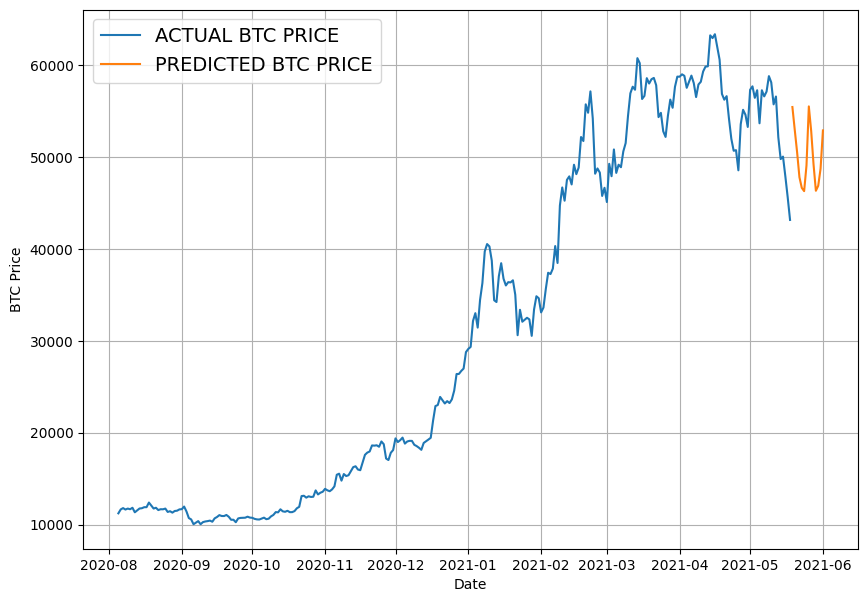

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label='ACTUAL BTC PRICE')
plot_time_series(next_timesteps, future_forecast, format='-', label='PREDICTED BTC PRICE')

In [ ]:
next_timesteps = np.insert(next_timesteps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])

In [ ]:
print('ronald')

ronald
